Two frames of reference:

Inertial $(\xi, \eta, \zeta)$ and a secondary axis fixed with the principal axis of inertia of the quadcopter $(x, y, z)$ 

A simplification of a quadcopter is a disk-shaped body of raduis $r$ and mass $m$ with mass-less thrusters, therefore $I_1 = I_2 = mr^2/4$ and $I_3 = mr^2/2$. These numbers are just used so simplify the equations. For most quadcopters the inertia tensor will have to be determined, but we will assume from now one that these symmetries in the inertia tensor are always applicable.

The two equations that govern the dynamics of the quadcopter are the Euler's equation for the angular momentum of a solid body

$$\begin{align}
I_1 \dot \omega_1 + (I_3 - I_2) \omega_2 \omega_3 & = M_1 \\
I_2 \dot \omega_2 + (I_1 - I_3) \omega_3 \omega_1 & = M_2 \\
I_3 \dot \omega_3 + (I_2 - I_1) \omega_2 \omega_1 & = M_3
\end{align}$$

and Newton's second law:

$$\sum \vec F_{ext} = m (\ddot \xi + \ddot \eta + \ddot \zeta)$$

One relevant simplification comes from the symmetry of the intertia tensor, that significantly simplifies Euler's angular momentum equation. The four thrusters are placed at $(r, 0, 0)$, $(-r, 0, 0)$, $(0, r, 0)$ and $(0, -r, 0)$ in the quadcopter axis, with thrust $F$ aligned with $z$. Therefore, the moments each thruster produce are  $(0, -F_1r, 0)$, $(0, F_2r, 0)$, $(F_3r, 0, 0)$ and $(-F_4r, 0, 0)$

Replacing the known values into Euler's equation:

$$\begin{align}
mr \dot \omega_1 & = 4(F_3 - F_4)\\
mr \dot \omega_2 & = 4(F_2 - F_1)
\end{align}
$$

This means that the quadcopter cannot yaw, unless there is a maneouver that is able to change the yaw angle preserving the angular momentum. Such strategies exist, but they are discarded in this simplified model. As a consequence, the movement of the quadcopter can be characterized by the three location coordinates $(\xi, \eta, \zeta)$ and by the pitch angle $\theta$ and roll angle $\phi$. The rotation of the quadcopter's reference frame can be characterized as the combination of the pitch and roll rotations:

$$\left( \begin{array}{c}
\xi\\
\eta\\
\zeta
\end{array}
\right)=
\left( \begin{array}{ccc}
\cos \phi & 
\sin \phi \sin \theta &
\sin \phi \cos \theta \\
0 & 
\cos \theta &
-\sin \theta \\
-\sin \theta &
\cos \phi \sin \theta &
\cos \phi \cos \theta
\end{array}
\right)
\left( \begin{array}{c}
x \\
y \\
z
\end{array}
\right)
$$

We can finally combine all the previous equations to find the equation of the movement given the four values for the thrust of each fan:


$$\begin{align}
mr \ddot \theta  & = 4(F_3 - F_4)\\
mr \ddot \phi & = 4(F_2 - F_1)\\
m \ddot \xi & = (F_1 + F_2 + F_3 + F_4) \sin \theta \cos \phi\\
m \ddot \eta & = -(F_1 + F_2 + F_3 + F_4) \sin \theta\\
m \ddot \zeta & = (F_1 + F_2 + F_3 + F_4) \cos \theta \cos \phi - mg
\end{align}
$$

where $g$ is the gravity acceleration.

These equations form a system of ordinary differential equations, that can be integrated easily using the scipy's integrate module:

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [58]:
def system(y, t, F1, F2, F3, F4, m, r, g):
    xi, eta, zeta, theta, phi, dxi, deta, dzeta, dtheta, dphi = y
    return [
        dxi, deta, dzeta, dtheta, dphi,
        np.sin(phi) * np.cos(theta) * (F1(t) + F2(t) + F3(t) + F4(t)) / m,
        -np.sin(theta) * (F1(t) + F2(t) + F3(t) + F4(t)) / m,
        np.cos(phi) * np.cos(theta) * (F1(t) + F2(t) + F3(t) + F4(t)) / m - g,
        4*(F3(t) - F4(t)) / (m * r),
        4*(F2(t) - F1(t)) / (m * r),
            ]

t = np.linspace(0, 4, 401)
y = odeint(
    system,
    [0, 0, 0, 0, 0,
     0, 0, 0, 0, 0],
    t,
    args=(lambda t: 0.49, lambda t: 0.5, lambda t: 0.5, lambda t: 0.5, 0.2, 1.0, 9.8))

<IPython.core.display.Javascript object>


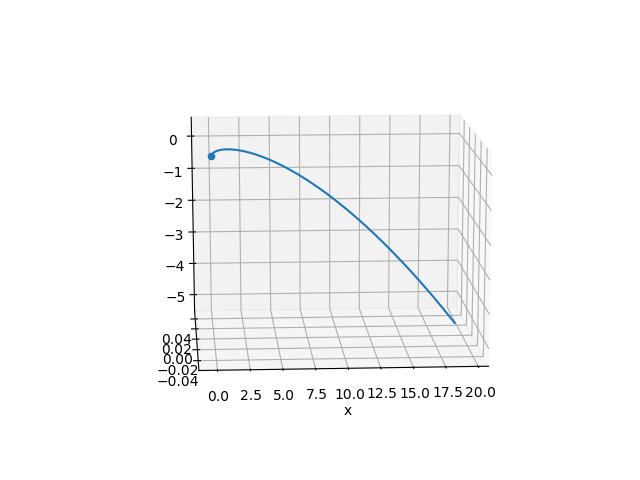

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(0,0,0)
ax.plot(y[:,0], y[:,1], y[:, 2])
ax.set_xlabel('x')

<IPython.core.display.Javascript object>


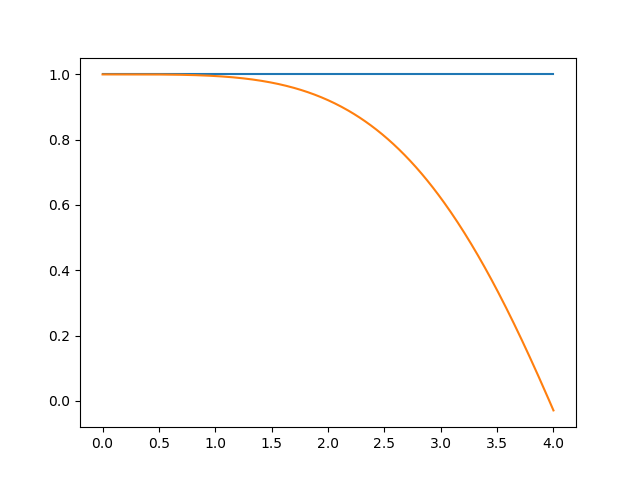

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.cos(y[:,3]))
ax.plot(t, np.cos(y[:,4]))